In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


df=pd.read_csv('BankChurners.csv')
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [37]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [38]:
del df['CLIENTNUM']

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [40]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [41]:
df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
df['Gender']=df['Gender'].replace({'F':0,'M':1})

/var/folders/rl/_d7g0j2d1_d7lbp6jk84l7xh0000gn/T/ipykernel_12105/3665760716.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
/var/folders/rl/_d7g0j2d1_d7lbp6jk84l7xh0000gn/T/ipykernel_12105/3665760716.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'F':0,'M':1})


In [42]:
selected_features = ['Education_Level', 'Marital_Status','Income_Category','Card_Category']

for column in selected_features:
    unique_values = df[column].unique()
    print(f"Unique values in the colum '{column}': {unique_values}")

Unique values in the colum 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in the colum 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in the colum 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in the colum 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']


In [43]:
unknown_count = df['Education_Level'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = df['Marital_Status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = df['Income_Category'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 1519
Number of 'Unknown' values in Marital_Status column: 749
Number of 'Unknown' values in Income_Category column: 1112


In [44]:
unknown_count = df['Customer_Age'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = df['Avg_Utilization_Ratio'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = df['Total_Ct_Chng_Q4_Q1'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 0
Number of 'Unknown' values in Marital_Status column: 0
Number of 'Unknown' values in Income_Category column: 0


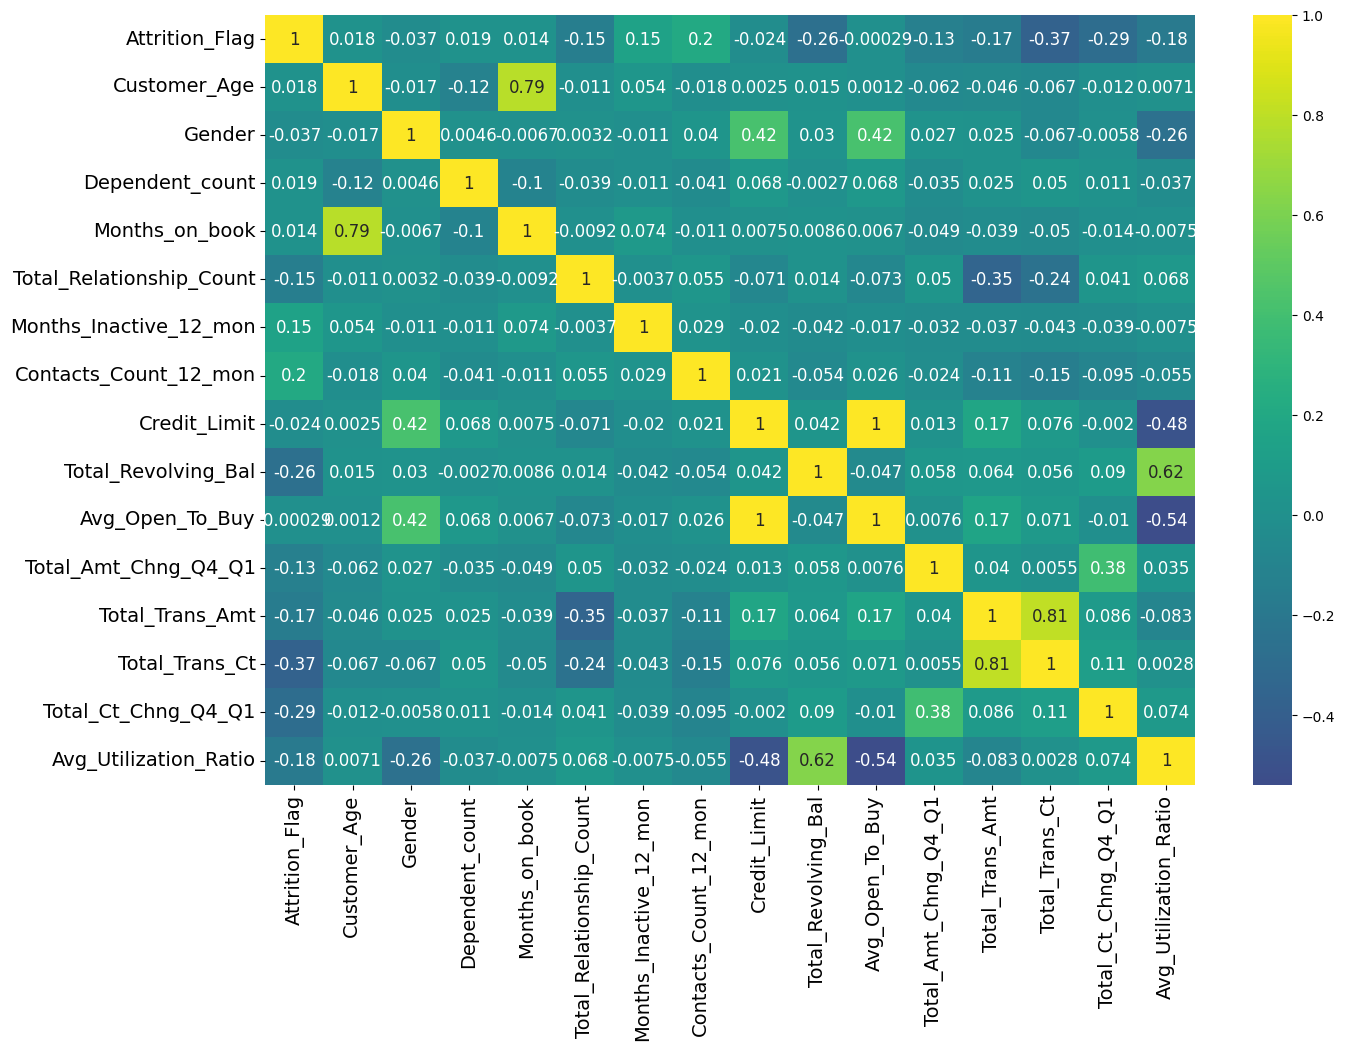

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

I droped one of the columns that highly correlated.

In [46]:
df = df.drop('Months_on_book', axis = 1)
df = df.drop('Avg_Open_To_Buy', axis = 1)
df = df.drop('Total_Trans_Ct', axis = 1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,816,2.500,0.000


For Outliers

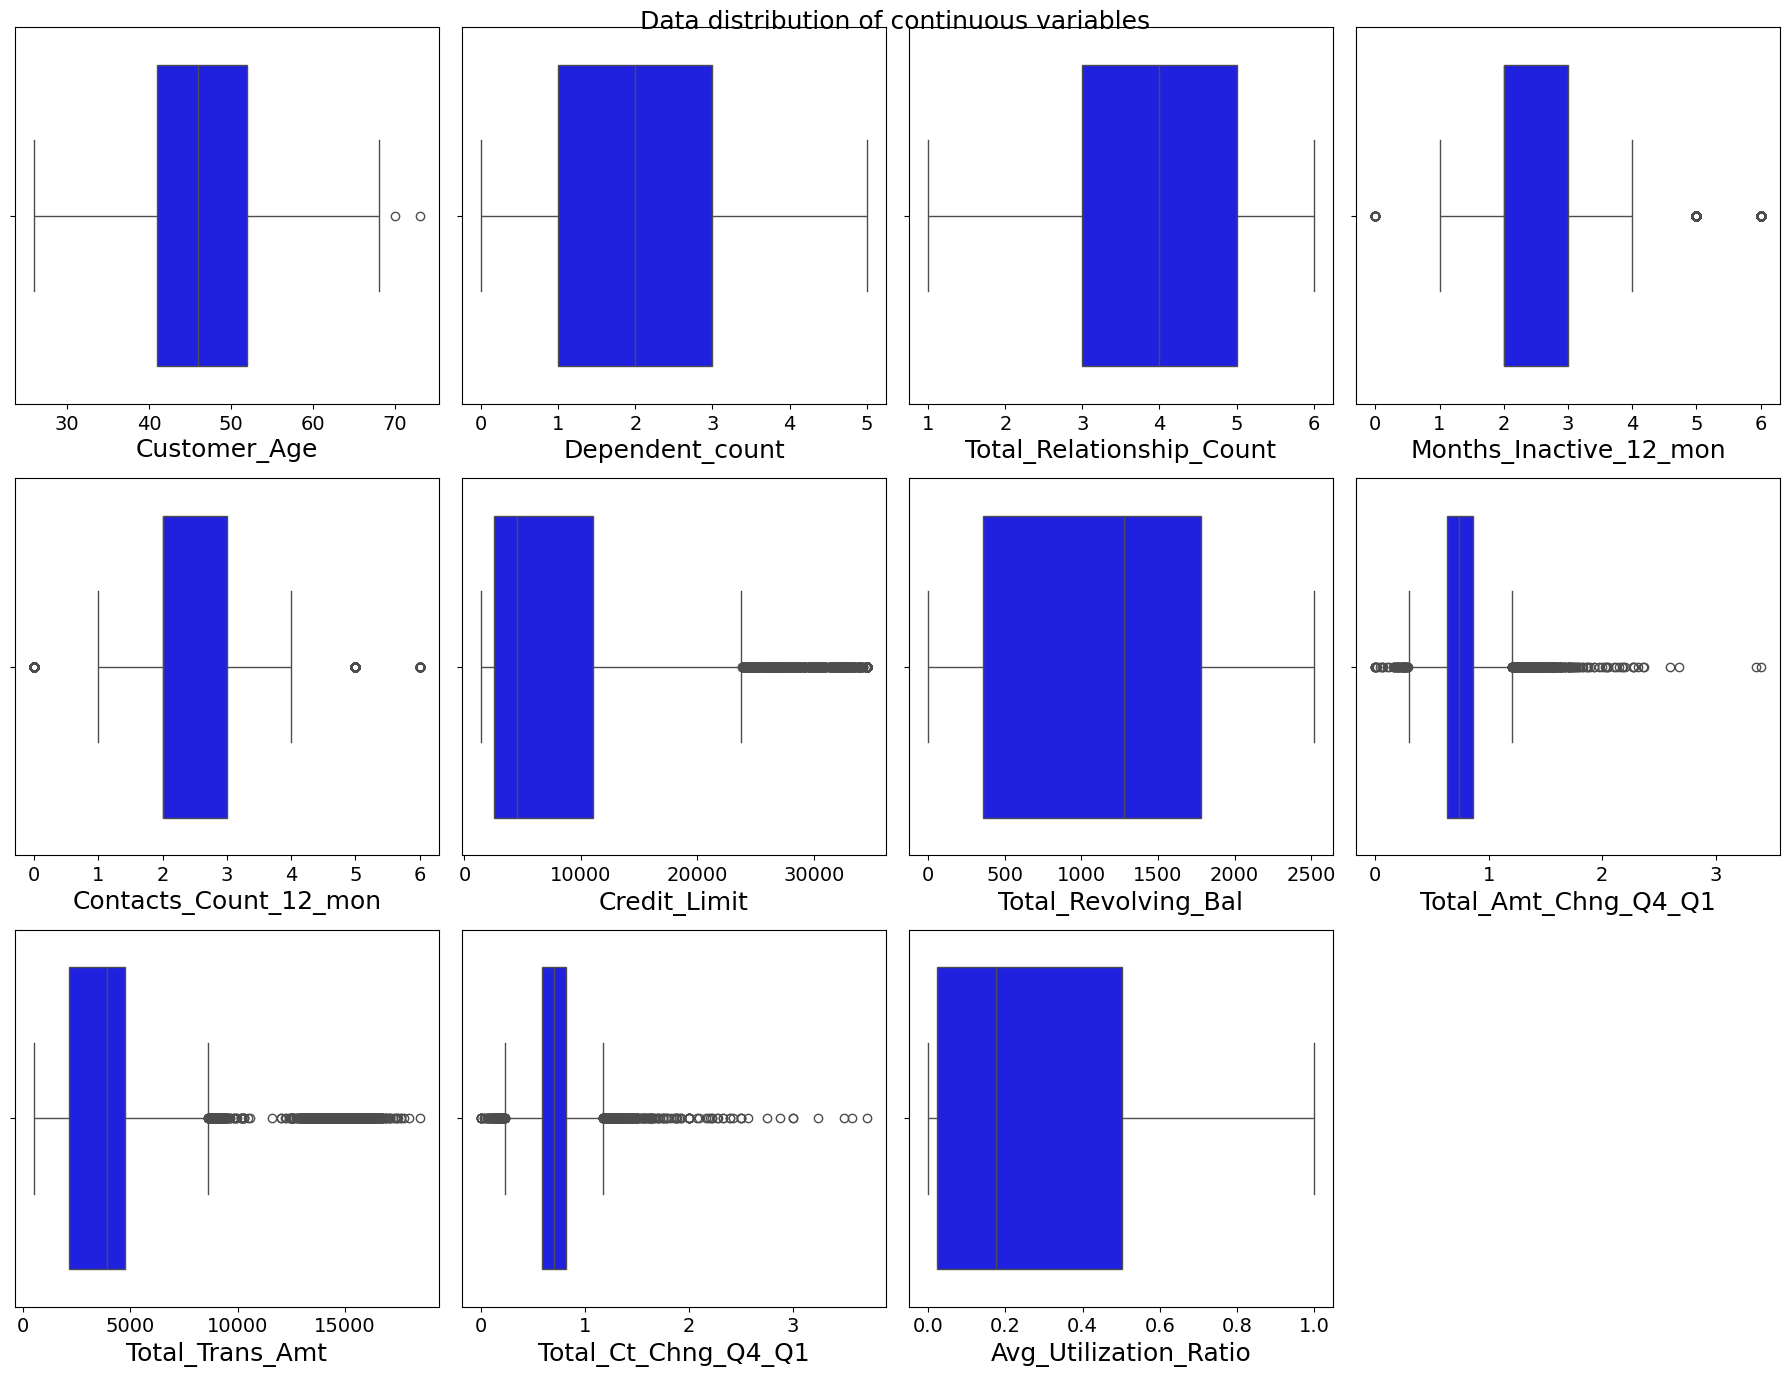

In [47]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['Attrition_Flag','Gender'], axis=1).select_dtypes(include=['int', 'float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='blue')
    ax.tick_params(axis='x', labelsize=14)
    ax.set_xlabel(col, fontsize=18)

plt.suptitle('Data distribution of continuous variables',fontsize=18)
plt.tight_layout()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [49]:
columns = ["Customer_Age", 'Dependent_count','Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for column_name in columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 3 * IQR)) |(df[column_name] > (Q3 + 3 * IQR)))]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 5 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9240 non-null   int64  
 1   Customer_Age              9240 non-null   int64  
 2   Gender                    9240 non-null   int64  
 3   Dependent_count           9240 non-null   int64  
 4   Education_Level           9240 non-null   object 
 5   Marital_Status            9240 non-null   object 
 6   Income_Category           9240 non-null   object 
 7   Card_Category             9240 non-null   object 
 8   Total_Relationship_Count  9240 non-null   int64  
 9   Months_Inactive_12_mon    9240 non-null   int64  
 10  Contacts_Count_12_mon     9240 non-null   int64  
 11  Credit_Limit              9240 non-null   float64
 12  Total_Revolving_Bal       9240 non-null   int64  
 13  Total_Amt_Chng_Q4_Q1      9240 non-null   float64
 14  Total_Trans_

In [50]:
unknown_count = df['Education_Level'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = df['Marital_Status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = df['Income_Category'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 1389
Number of 'Unknown' values in Marital_Status column: 687
Number of 'Unknown' values in Income_Category column: 1039


In [51]:
#df = df[df['Marital_Status'] != 'Unknown']

In [52]:
unknown_count = df['Education_Level'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = df['Marital_Status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = df['Income_Category'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 1389
Number of 'Unknown' values in Marital_Status column: 687
Number of 'Unknown' values in Income_Category column: 1039


In [53]:
df1 = df.copy()
df1 = pd.concat([df1,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df1.drop(columns = ['Education_Level','Marital_Status','Income_Category','Marital_Status','Card_Category'],inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 5 to 10126
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9240 non-null   int64  
 1   Customer_Age              9240 non-null   int64  
 2   Gender                    9240 non-null   int64  
 3   Dependent_count           9240 non-null   int64  
 4   Total_Relationship_Count  9240 non-null   int64  
 5   Months_Inactive_12_mon    9240 non-null   int64  
 6   Contacts_Count_12_mon     9240 non-null   int64  
 7   Credit_Limit              9240 non-null   float64
 8   Total_Revolving_Bal       9240 non-null   int64  
 9   Total_Amt_Chng_Q4_Q1      9240 non-null   float64
 10  Total_Trans_Amt           9240 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1       9240 non-null   float64
 12  Avg_Utilization_Ratio     9240 non-null   float64
 13  College                   9240 non-null   bool   
 14  Doctorate   

In [55]:
df1.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
5,0,44,1,2,3,1,2,4010.0,1247,1.376,...,True,False,False,False,False,True,False,True,False,False
9,0,48,1,2,6,3,3,11656.0,1677,1.524,...,False,False,True,False,False,False,True,True,False,False
10,0,42,1,5,5,3,2,6748.0,1467,0.831,...,False,False,False,False,False,False,False,True,False,False
11,0,65,1,1,6,2,3,9095.0,1587,1.433,...,True,False,False,False,False,True,False,True,False,False
14,0,57,0,2,5,2,2,2436.0,680,1.190,...,False,False,False,True,False,True,False,True,False,False


In [56]:
df3 = df1.copy()
#del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
#del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
#del df['CLIENTNUM']

#df3 = df.drop('Months_on_book', axis = 1)
#df3 = df.drop('Avg_Open_To_Buy', axis = 1)
#df3 = df.drop('Total_Trans_Ct', axis = 1)
df3 = df[df['Marital_Status'] != 'Unknown']

In [57]:

df3['Income_Category'] = df['Income_Category'].replace('Unknown', df['Income_Category'].mode()[0])
df3['Education_Level'] = df['Education_Level'].replace('Unknown', df['Education_Level'].mode()[0])

df3['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
df3['Gender']=df['Gender'].replace({'F':0,'M':1})


/var/folders/rl/_d7g0j2d1_d7lbp6jk84l7xh0000gn/T/ipykernel_12105/4134103774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Income_Category'] = df['Income_Category'].replace('Unknown', df['Income_Category'].mode()[0])
/var/folders/rl/_d7g0j2d1_d7lbp6jk84l7xh0000gn/T/ipykernel_12105/4134103774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Education_Level'] = df['Education_Level'].replace('Unknown', df['Education_Level'].mode()[0])
/var/folders/rl/_d7g0j2d1_d7lbp6jk84l7xh0000gn/T/ipykernel

In [58]:
unknown_count = df3['Education_Level'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = df3['Marital_Status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = df3['Income_Category'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 0
Number of 'Unknown' values in Marital_Status column: 0
Number of 'Unknown' values in Income_Category column: 0


In [59]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8553 entries, 5 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8553 non-null   int64  
 1   Customer_Age              8553 non-null   int64  
 2   Gender                    8553 non-null   int64  
 3   Dependent_count           8553 non-null   int64  
 4   Education_Level           8553 non-null   object 
 5   Marital_Status            8553 non-null   object 
 6   Income_Category           8553 non-null   object 
 7   Card_Category             8553 non-null   object 
 8   Total_Relationship_Count  8553 non-null   int64  
 9   Months_Inactive_12_mon    8553 non-null   int64  
 10  Contacts_Count_12_mon     8553 non-null   int64  
 11  Credit_Limit              8553 non-null   float64
 12  Total_Revolving_Bal       8553 non-null   int64  
 13  Total_Amt_Chng_Q4_Q1      8553 non-null   float64
 14  Total_Trans_

In [60]:

df3 = pd.concat([df3,pd.get_dummies(df3['Education_Level'])],axis=1)
df3 = pd.concat([df3,pd.get_dummies(df3['Income_Category'])],axis=1)
df3 = pd.concat([df3,pd.get_dummies(df3['Card_Category'])],axis=1)
df3.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)
df3.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
5,0,44,1,2,3,1,2,4010.0,1247,1.376,...,False,False,True,False,False,False,True,False,False,False
9,0,48,1,2,6,3,3,11656.0,1677,1.524,...,False,False,False,False,True,False,True,False,False,False
11,0,65,1,1,6,2,3,9095.0,1587,1.433,...,False,False,True,False,False,False,True,False,False,False
14,0,57,0,2,5,2,2,2436.0,680,1.190,...,False,False,False,False,False,True,True,False,False,False
19,0,45,0,2,6,1,2,14470.0,1157,0.966,...,False,False,False,False,False,True,True,False,False,False


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 5 to 10126
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            9240 non-null   int64  
 1   Customer_Age              9240 non-null   int64  
 2   Gender                    9240 non-null   int64  
 3   Dependent_count           9240 non-null   int64  
 4   Total_Relationship_Count  9240 non-null   int64  
 5   Months_Inactive_12_mon    9240 non-null   int64  
 6   Contacts_Count_12_mon     9240 non-null   int64  
 7   Credit_Limit              9240 non-null   float64
 8   Total_Revolving_Bal       9240 non-null   int64  
 9   Total_Amt_Chng_Q4_Q1      9240 non-null   float64
 10  Total_Trans_Amt           9240 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1       9240 non-null   float64
 12  Avg_Utilization_Ratio     9240 non-null   float64
 13  College                   9240 non-null   bool   
 14  Doctorate   

In [62]:
X=df1.drop(['Attrition_Flag'],axis=1)
y=df1['Attrition_Flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

In [63]:
#Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [64]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]

model_comparison = {}  #Dictionary to store the comparison metrics of models

for model_name, classifier in models:
    #Fit the model using the training set
    # Ajustar el modelo usando el conjunto de entrenamiento
    classifier.fit(X_train, y_train)
    #Make predictions on the test set
    # Realizar predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test)
    #Calculate model metrics
    # Calcular métricas del modelo
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="recall")
    cv_accuracy = accuracies.mean()
    cv_std = accuracies.std()
    accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
    accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])
    #Print model metrics
    # Imprimir métricas del modelo
    print(f"Modelo: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")

      #Add metrics to the models comparison dictionary
    model_comparison[model_name] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
    print(classification_report(y_pred, y_test, zero_division=1))
    print("-" * 60)

Modelo: Logistic Regression
Model Accuracy: 86.97%
Model F1-Score: 88.54%
Cross Val Accuracy: 44.41%
Cross Val Standard Deviation: 3.66%
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2085
           1       0.41      0.73      0.52       225

    accuracy                           0.87      2310
   macro avg       0.69      0.81      0.72      2310
weighted avg       0.91      0.87      0.89      2310

------------------------------------------------------------
Modelo: Decision Tree
Model Accuracy: 92.51%
Model F1-Score: 92.61%
Cross Val Accuracy: 77.75%
Cross Val Standard Deviation: 1.61%
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1931
           1       0.75      0.81      0.78       379

    accuracy                           0.93      2310
   macro avg       0.86      0.88      0.87      2310
weighted avg       0.93      0.93      0.93      2310

-----------------

#Ensemble methods in machine learning involve combining multiple models (often weaker models or base models) to create a stronger,more robust predictive model. The idea behind ensembling is that by combining the predictions of multiple models, the strengths of each individual model can compensate for the weaknesses of others, leading to improved overall performance.

In [65]:
from sklearn.ensemble import VotingClassifier

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]
voting_classifier = VotingClassifier(estimators=models, voting='soft')  # Puedes usar 'hard' o 'soft' para el voto

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='weighted')
accuracies = cross_val_score(estimator=voting_classifier, X=X_train, y=y_train, cv=5, scoring="recall")
cv_accuracy = accuracies.mean()
cv_std = accuracies.std()
accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])

print("Modelo: Voting Classifier")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model F1-Score: {f1 * 100:.2f}%")
print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")
model_comparison['Voting Classifier'] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
print(classification_report(y_pred, y_test, zero_division=1))
print("-" * 60)


Modelo: Voting Classifier
Model Accuracy: 92.94%
Model F1-Score: 93.38%
Cross Val Accuracy: 67.00%
Cross Val Standard Deviation: 1.30%
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2011
           1       0.67      0.91      0.77       299

    accuracy                           0.93      2310
   macro avg       0.83      0.92      0.86      2310
weighted avg       0.94      0.93      0.93      2310

------------------------------------------------------------


In [66]:
X=df3.drop(['Attrition_Flag'],axis=1)
y=df3['Attrition_Flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8553 entries, 5 to 10126
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8553 non-null   int64  
 1   Customer_Age              8553 non-null   int64  
 2   Gender                    8553 non-null   int64  
 3   Dependent_count           8553 non-null   int64  
 4   Total_Relationship_Count  8553 non-null   int64  
 5   Months_Inactive_12_mon    8553 non-null   int64  
 6   Contacts_Count_12_mon     8553 non-null   int64  
 7   Credit_Limit              8553 non-null   float64
 8   Total_Revolving_Bal       8553 non-null   int64  
 9   Total_Amt_Chng_Q4_Q1      8553 non-null   float64
 10  Total_Trans_Amt           8553 non-null   int64  
 11  Total_Ct_Chng_Q4_Q1       8553 non-null   float64
 12  Avg_Utilization_Ratio     8553 non-null   float64
 13  College                   8553 non-null   bool   
 14  Doctorate   

In [67]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]

model_comparison = {}  #Dictionary to store the comparison metrics of models

for model_name, classifier in models:
    #Fit the model using the training set
    classifier.fit(X_train, y_train)
   #Make predictions on the test set
    y_pred = classifier.predict(X_test)
    #Calculate model metrics
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="recall")
    cv_accuracy = accuracies.mean()
    cv_std = accuracies.std()
    accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
    accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])
    #Print model metrics
    print(f"Modelo: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")

      #Add metrics to the models comparison dictionary
    model_comparison[model_name] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
    print(classification_report(y_pred, y_test, zero_division=1))
    print("-" * 60)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Modelo: Logistic Regression
Model Accuracy: 86.30%
Model F1-Score: 88.27%
Cross Val Accuracy: 33.54%
Cross Val Standard Deviation: 1.34%
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1954
           1       0.36      0.72      0.48       185

    accuracy                           0.86      2139
   macro avg       0.66      0.80      0.70      2139
weighted avg       0.92      0.86      0.88      2139

------------------------------------------------------------
Modelo: Decision Tree
Model Accuracy: 92.85%
Model F1-Score: 92.80%
Cross Val Accuracy: 78.59%
Cross Val Standard Deviation: 2.08%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1752
           1       0.81      0.79      0.80       387

    accuracy                           0.93      2139
   macro avg       0.88      0.87      0.88      2139
weighted avg       0.93      0.93      0.93      2139

-----------------